In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial import distance_matrix

In [2]:
# Example from scikit-learn
# https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage

In [3]:
# Small example
linkage_fun = 'min'
np.random.seed(19112023)
x = np.random.uniform(size=(6, 2))

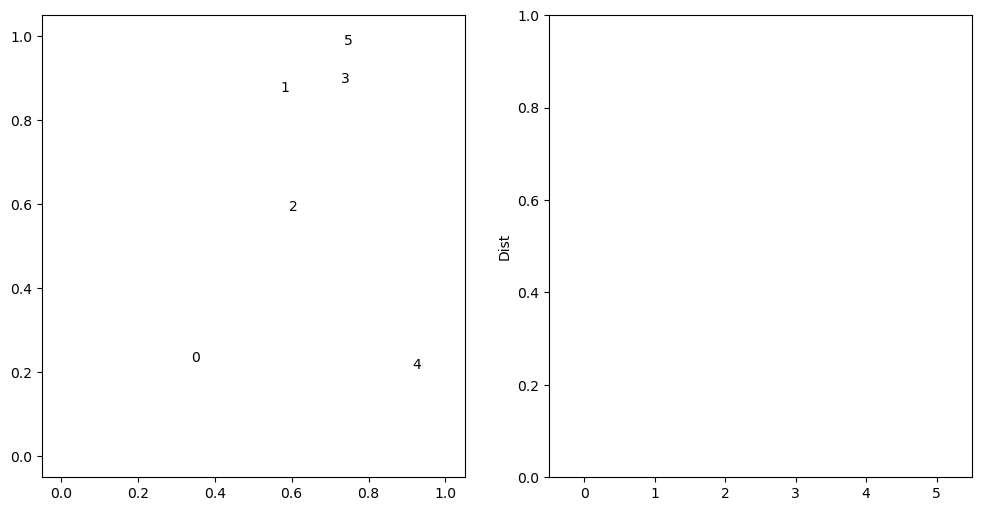

In [4]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax_x = plt.subplot(gs[0])
for ii in range(x.shape[0]):
    ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center')
    
ax_x.set_ylim([-0.05, 1.05])
ax_x.set_xlim([-0.05, 1.05])

ax_dist = plt.subplot(gs[1])
h = ax_dist.set_ylim([0, 1])
h = ax_dist.set_ylabel('Dist')
h = ax_dist.set_xlim([-0.5, x.shape[0] - 0.5])
h = ax_dist.set_xticks(range(x.shape[0]))

In [5]:
d = pd.DataFrame(distance_matrix(x, x), index=range(6), columns=range(6))
print(d.round(2))

      0     1     2     3     4     5
0  0.00  0.68  0.44  0.77  0.58  0.85
1  0.68  0.00  0.28  0.16  0.74  0.20
2  0.44  0.28  0.00  0.33  0.49  0.42
3  0.77  0.16  0.33  0.00  0.71  0.09
4  0.58  0.74  0.49  0.71  0.00  0.79
5  0.85  0.20  0.42  0.09  0.79  0.00


In [6]:
# Find the minimum distance
# Look only the upper triangular part of d (ignoring the diagonal as well)
# mask is True for upper triangular, False for diagonal and lower triangular
mask = np.ones(d.shape).astype(bool)
mask[np.tril(mask)] = False
# Min distance is d_min
d_min = d.values[mask].min()
# But we want to know which pair of points
d_ind = np.triu_indices_from(d.values, k=1) # k=1 ignores the diagonal again
d_argmin = d.values[mask].argmin()
A = [d.columns[d_ind[0][d_argmin]], d.index[d_ind[1][d_argmin]]]
print(A)

[3, 5]


In [7]:
# SINGLE LINKAGE
d_min = [d_min]

In [8]:
# We'll merge 3 and 5 into a new cluster, A
d.loc['A'] = d[A].apply(linkage_fun, axis=1)
d['A'] = d[A].apply(linkage_fun, axis=1)
print(d.round(2))

      0     1     2     3     4     5     A
0  0.00  0.68  0.44  0.77  0.58  0.85  0.77
1  0.68  0.00  0.28  0.16  0.74  0.20  0.16
2  0.44  0.28  0.00  0.33  0.49  0.42  0.33
3  0.77  0.16  0.33  0.00  0.71  0.09  0.00
4  0.58  0.74  0.49  0.71  0.00  0.79  0.71
5  0.85  0.20  0.42  0.09  0.79  0.00  0.00
A  0.77  0.16  0.33  0.00  0.71  0.00  0.00


In [9]:
d.drop(A, axis=0, inplace=True)
d.drop(A, axis=1, inplace=True)
print(d.round(2))

      0     1     2     4     A
0  0.00  0.68  0.44  0.58  0.77
1  0.68  0.00  0.28  0.74  0.16
2  0.44  0.28  0.00  0.49  0.33
4  0.58  0.74  0.49  0.00  0.71
A  0.77  0.16  0.33  0.71  0.00


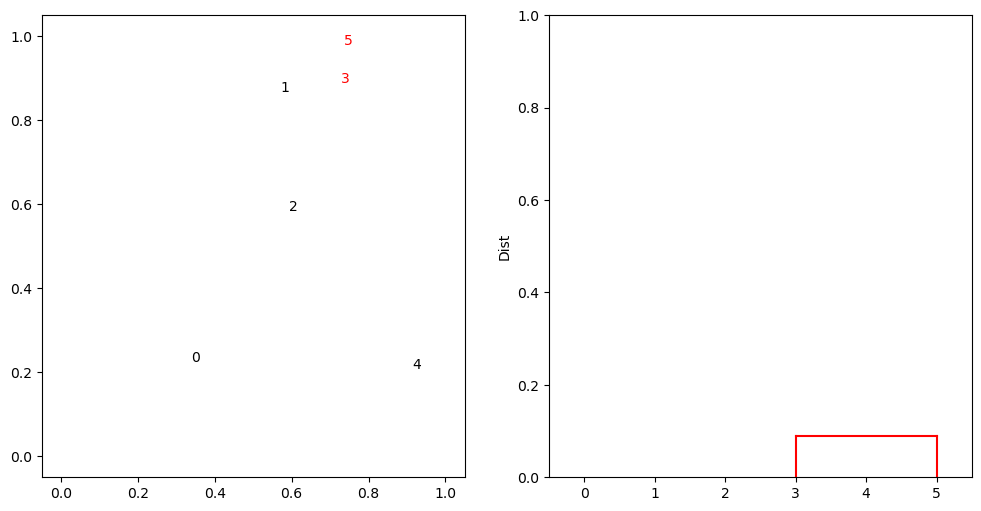

In [10]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

Ax = A
dA = [0, 0, d_min[0]]

ax_x = plt.subplot(gs[0])
for ii in range(x.shape[0]):
    if ii in A:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='red')
    else:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center')
    
ax_x.set_ylim([-0.05, 1.05])
ax_x.set_xlim([-0.05, 1.05])

ax_dist = plt.subplot(gs[1])
ax_dist.plot([Ax[0], Ax[0]], [dA[0], dA[2]], color='red')
ax_dist.plot([Ax[0], Ax[1]], [dA[2], dA[2]], color='red')
ax_dist.plot([Ax[1], Ax[1]], [dA[1], dA[2]], color='red')
h = ax_dist.set_ylim([0, 1])
h = ax_dist.set_ylabel('Dist')
h = ax_dist.set_xlim([-0.5, x.shape[0] - 0.5])
h = ax_dist.set_xticks(range(x.shape[0]))

In [11]:
# Find the minimum distance
# Look only the upper triangular part of d (ignoring the diagonal as well)
# mask is True for upper triangular, False for diagonal and lower triangular
mask = np.ones(d.shape).astype(bool)
mask[np.tril(mask)] = False
# Min distance is d_min
d_min = d_min + [d.values[mask].min()]
# But we want to know which pair of points
d_ind = np.triu_indices_from(d.values, k=1) # k=1 ignores the diagonal again
d_argmin = d.values[mask].argmin()
B = [d.columns[d_ind[0][d_argmin]], d.index[d_ind[1][d_argmin]]]
print(B)

[1, 'A']


In [12]:
# We'll merge into a new cluster B
d.loc['B'] = d[B].apply(linkage_fun, axis=1)
d['B'] = d[B].apply(linkage_fun, axis=1)
print(d.round(2))

      0     1     2     4     A     B
0  0.00  0.68  0.44  0.58  0.77  0.68
1  0.68  0.00  0.28  0.74  0.16  0.00
2  0.44  0.28  0.00  0.49  0.33  0.28
4  0.58  0.74  0.49  0.00  0.71  0.71
A  0.77  0.16  0.33  0.71  0.00  0.00
B  0.68  0.00  0.28  0.71  0.00  0.00


In [13]:
d.drop(B, axis=0, inplace=True)
d.drop(B, axis=1, inplace=True)
print(d.round(2))

      0     2     4     B
0  0.00  0.44  0.58  0.68
2  0.44  0.00  0.49  0.28
4  0.58  0.49  0.00  0.71
B  0.68  0.28  0.71  0.00


In [14]:
if 'A' in B:
    notA_ind = np.where(np.array(B) != 'A')[0][0]
    Bx = [B[notA_ind], 0.5*(Ax[0] + Ax[1])]
    dB = [0, d_min[0], d_min[1]]
    B_desc = [B[notA_ind]] + A
else:
    Bx = B
    dB = [0, 0, d_min[1]]
    B_desc = B

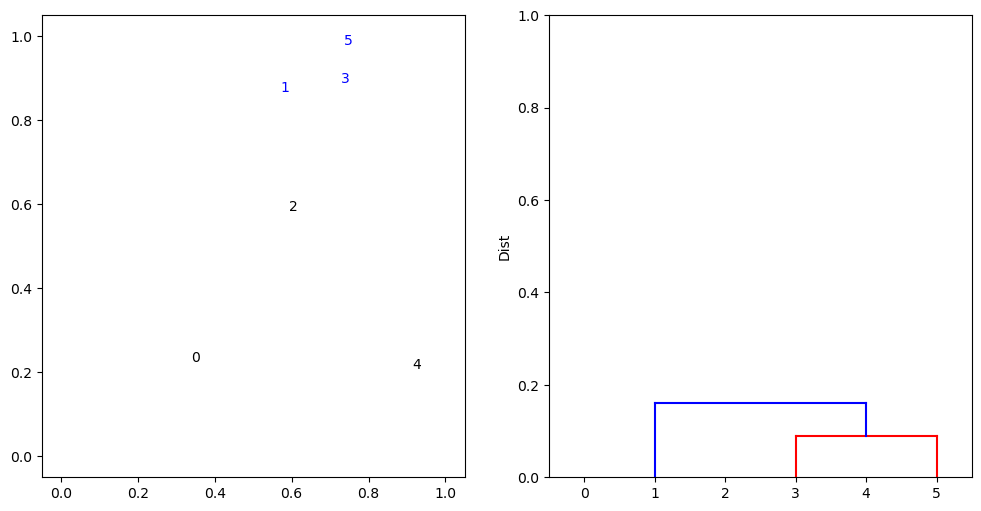

In [15]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax_x = plt.subplot(gs[0])
for ii in range(x.shape[0]):
    if ii in B_desc:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='blue')
    elif ii in A:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='red')
    else:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center')
    
ax_x.set_ylim([-0.05, 1.05])
ax_x.set_xlim([-0.05, 1.05])

ax_dist = plt.subplot(gs[1])
ax_dist.plot([Ax[0], Ax[0]], [dA[0], dA[2]], color='red')
ax_dist.plot([Ax[0], Ax[1]], [dA[2], dA[2]], color='red')
ax_dist.plot([Ax[1], Ax[1]], [dA[1], dA[2]], color='red')
ax_dist.plot([Bx[0], Bx[0]], [dB[0], dB[2]], color='blue')
ax_dist.plot([Bx[0], Bx[1]], [dB[2], dB[2]], color='blue')
ax_dist.plot([Bx[1], Bx[1]], [dB[1], dB[2]], color='blue')
h = ax_dist.set_ylim([0, 1])
h = ax_dist.set_ylabel('Dist')
h = ax_dist.set_xlim([-0.5, x.shape[0] - 0.5])
h = ax_dist.set_xticks(range(x.shape[0]))

In [16]:
# Find the minimum distance
# Look only the upper triangular part of d (ignoring the diagonal as well)
# mask is True for upper triangular, False for diagonal and lower triangular
mask = np.ones(d.shape).astype(bool)
mask[np.tril(mask)] = False
# Min distance is d_min
d_min = d_min + [d.values[mask].min()]
# But we want to know which pair of points
d_ind = np.triu_indices_from(d.values, k=1) # k=1 ignores the diagonal again
d_argmin = d.values[mask].argmin()
C = [d.columns[d_ind[0][d_argmin]], d.index[d_ind[1][d_argmin]]]
print(C)

[2, 'B']


In [17]:
# We'll merge into a new cluster C
d.loc['C'] = d[C].apply(linkage_fun, axis=1)
d['C'] = d[C].apply(linkage_fun, axis=1)
print(d.round(2))

      0     2     4     B     C
0  0.00  0.44  0.58  0.68  0.44
2  0.44  0.00  0.49  0.28  0.00
4  0.58  0.49  0.00  0.71  0.49
B  0.68  0.28  0.71  0.00  0.00
C  0.44  0.00  0.49  0.00  0.00


In [18]:
d.drop(C, axis=0, inplace=True)
d.drop(C, axis=1, inplace=True)
print(d.round(2))

      0     4     C
0  0.00  0.58  0.44
4  0.58  0.00  0.49
C  0.44  0.49  0.00


In [19]:
if ('A' in C) and ('B' in C):
    Cx = [0.5*(Ax[0] + Ax[1]), 0.5*(Bx[0] + Bx[1])]
    dC = [d_min[0], d_min[1], d_min[2]]
    C_desc = B_desc + A
elif 'B' in C:
    notB_ind = np.where(np.array(C) != 'B')[0][0]
    Cx = [C[notB_ind], 0.5*(Bx[0] + Bx[1])]
    dC = [0, d_min[1], d_min[2]]
    C_desc = [C[notB_ind]] + B_desc
elif 'A' in C:
    notA_ind = np.where(np.array(C) != 'A')[0][0]
    Cx = [C[notA_ind], 0.5*(Ax[0] + Ax[1])]
    dC = [0, d_min[0], d_min[2]]
    C_desc = [C[notB_ind]] + A
else:
    Cx = C
    dC = [0, 0, d_min[2]]
    C_desc = C

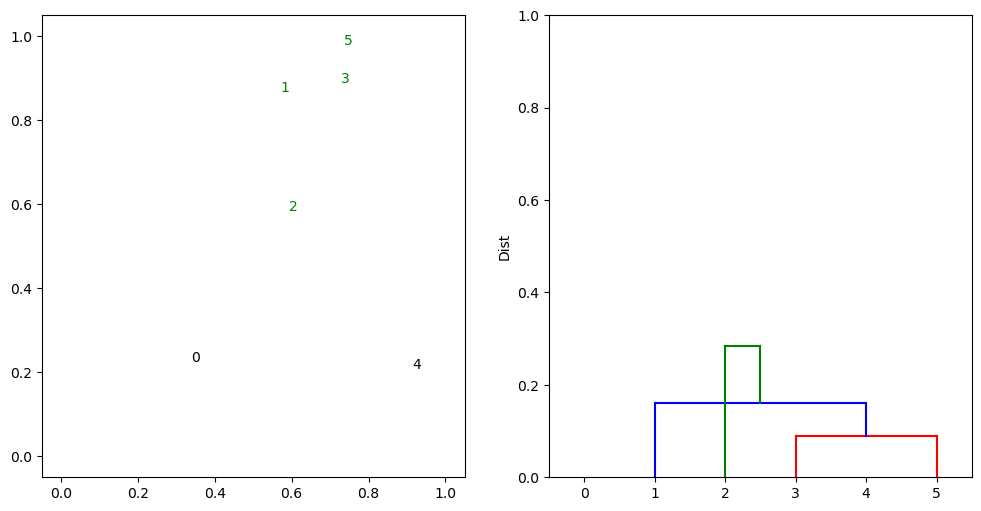

In [20]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax_x = plt.subplot(gs[0])
for ii in range(x.shape[0]):
    if ii in C_desc:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='green')
    elif ii in B_desc:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='blue')
    elif ii in A:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='red')
    else:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center')
    
ax_x.set_ylim([-0.05, 1.05])
ax_x.set_xlim([-0.05, 1.05])

ax_dist = plt.subplot(gs[1])
ax_dist.plot([Ax[0], Ax[0]], [dA[0], dA[2]], color='red')
ax_dist.plot([Ax[0], Ax[1]], [dA[2], dA[2]], color='red')
ax_dist.plot([Ax[1], Ax[1]], [dA[1], dA[2]], color='red')
ax_dist.plot([Bx[0], Bx[0]], [dB[0], dB[2]], color='blue')
ax_dist.plot([Bx[0], Bx[1]], [dB[2], dB[2]], color='blue')
ax_dist.plot([Bx[1], Bx[1]], [dB[1], dB[2]], color='blue')
ax_dist.plot([Cx[0], Cx[0]], [dC[0], dC[2]], color='green')
ax_dist.plot([Cx[0], Cx[1]], [dC[2], dC[2]], color='green')
ax_dist.plot([Cx[1], Cx[1]], [dC[1], dC[2]], color='green')
h = ax_dist.set_ylim([0, 1])
h = ax_dist.set_ylabel('Dist')
h = ax_dist.set_xlim([-0.5, x.shape[0] - 0.5])
h = ax_dist.set_xticks(range(x.shape[0]))

In [21]:
# Find the minimum distance
# Look only the upper triangular part of d (ignoring the diagonal as well)
# mask is True for upper triangular, False for diagonal and lower triangular
mask = np.ones(d.shape).astype(bool)
mask[np.tril(mask)] = False
# Min distance is d_min
d_min = d_min + [d.values[mask].min()]
# But we want to know which pair of points
d_ind = np.triu_indices_from(d.values, k=1) # k=1 ignores the diagonal again
d_argmin = d.values[mask].argmin()
D = [d.columns[d_ind[0][d_argmin]], d.index[d_ind[1][d_argmin]]]
print(D)

[0, 'C']


In [22]:
# We'll merge into a new cluster D
d.loc['D'] = d[D].apply(linkage_fun, axis=1)
d['D'] = d[D].apply(linkage_fun, axis=1)
print(d.round(2))

      0     4     C     D
0  0.00  0.58  0.44  0.00
4  0.58  0.00  0.49  0.49
C  0.44  0.49  0.00  0.00
D  0.00  0.49  0.00  0.00


In [23]:
d.drop(D, axis=0, inplace=True)
d.drop(D, axis=1, inplace=True)
print(d.round(2))

      4     D
4  0.00  0.49
D  0.49  0.00


In [24]:
if ('A' in D) and ('B' in D):
    Dx = [0.5*(Ax[0] + Ax[1]), 0.5*(Bx[0] + Bx[1])]
    dD = [d_min[0], d_min[1], d_min[3]]
    D_desc = B_desc + A
elif ('A' in D) and ('C' in D):
    Dx = [0.5*(Ax[0] + Ax[1]), 0.5*(Cx[0] + Cx[1])]
    dD = [d_min[0], d_min[2], d_min[3]]
    D_desc = C_desc + A
elif ('B' in D) and ('C' in D):
    Dx = [0.5*(Bx[0] + Bx[1]), 0.5*(Cx[0] + Cx[1])]
    dD = [d_min[1], d_min[2], d_min[3]]
    D_desc = B_desc + C_desc
elif 'C' in D:
    notC_ind = np.where(np.array(D) != 'C')[0][0]
    Dx = [D[notC_ind], 0.5*(Cx[0] + Cx[1])]
    dD = [0, d_min[2], d_min[3]]
    D_desc = [D[notC_ind]] + C_desc
elif 'B' in D:
    notB_ind = np.where(np.array(D) != 'B')[0][0]
    Dx = [D[notB_ind], 0.5*(Bx[0] + Bx[1])]
    dD = [0, d_min[1], d_min[3]]
    D_desc = [D[notB_ind]] + B_desc
elif 'A' in D:
    notA_ind = np.where(np.array(D) != 'A')[0][0]
    Dx = [D[notA_ind], 0.5*(Ax[0] + Ax[1])]
    dD = [0, d_min[0], d_min[3]]
    D_desc = [D[notB_ind]] + A
else:
    Dx = D
    dD = [0, 0, d_min[3]]
    D_desc = D

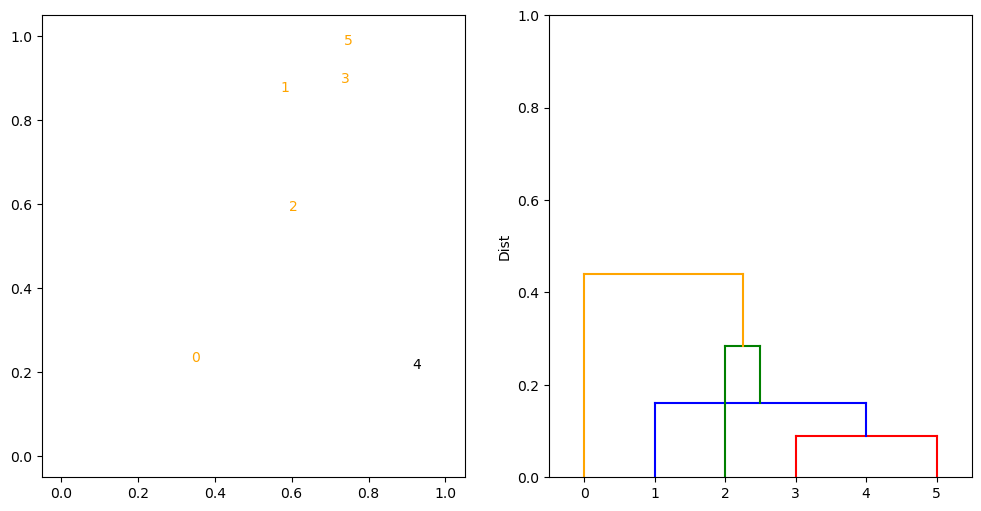

In [25]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax_x = plt.subplot(gs[0])
for ii in range(x.shape[0]):
    if ii in D_desc:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='orange')
    elif ii in C_desc:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='green')
    elif ii in B_desc:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='blue')
    elif ii in A:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='red')
    else:
        ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center')
    
ax_x.set_ylim([-0.05, 1.05])
ax_x.set_xlim([-0.05, 1.05])

ax_dist = plt.subplot(gs[1])
ax_dist.plot([Ax[0], Ax[0]], [dA[0], dA[2]], color='red')
ax_dist.plot([Ax[0], Ax[1]], [dA[2], dA[2]], color='red')
ax_dist.plot([Ax[1], Ax[1]], [dA[1], dA[2]], color='red')
ax_dist.plot([Bx[0], Bx[0]], [dB[0], dB[2]], color='blue')
ax_dist.plot([Bx[0], Bx[1]], [dB[2], dB[2]], color='blue')
ax_dist.plot([Bx[1], Bx[1]], [dB[1], dB[2]], color='blue')
ax_dist.plot([Cx[0], Cx[0]], [dC[0], dC[2]], color='green')
ax_dist.plot([Cx[0], Cx[1]], [dC[2], dC[2]], color='green')
ax_dist.plot([Cx[1], Cx[1]], [dC[1], dC[2]], color='green')
ax_dist.plot([Dx[0], Dx[0]], [dD[0], dD[2]], color='orange')
ax_dist.plot([Dx[0], Dx[1]], [dD[2], dD[2]], color='orange')
ax_dist.plot([Dx[1], Dx[1]], [dD[1], dD[2]], color='orange')
h = ax_dist.set_ylim([0, 1])
h = ax_dist.set_ylabel('Dist')
h = ax_dist.set_xlim([-0.5, x.shape[0] - 0.5])
h = ax_dist.set_xticks(range(x.shape[0]))

In [26]:
E = list(d.columns)
d_min = d_min + [d.iloc[0, 1]]

if ('A' in E) and ('B' in E):
    Ex = [0.5*(Ax[0] + Ax[1]), 0.5*(Bx[0] + Bx[1])]
    dE = [d_min[0], d_min[1], d_min[3]]
elif ('A' in E) and ('C' in E):
    Ex = [0.5*(Ax[0] + Ax[1]), 0.5*(Cx[0] + Cx[1])]
    dE = [d_min[0], d_min[2], d_min[3]]
elif ('B' in E) and ('C' in E):
    Ex = [0.5*(Bx[0] + Bx[1]), 0.5*(Cx[0] + Cx[1])]
    dE = [d_min[1], d_min[2], d_min[3]]
elif ('A' in E) and ('D' in E):
    Ex = [0.5*(Ax[0] + Ax[1]), 0.5*(Dx[0] + Dx[1])]
    dE = [d_min[0], d_min[3], d_min[4]]
elif ('B' in E) and ('D' in E):
    Ex = [0.5*(Bx[0] + Bx[1]), 0.5*(Dx[0] + Dx[1])]
    dE = [d_min[1], d_min[3], d_min[4]]
elif ('C' in E) and ('D' in E):
    Ex = [0.5*(Cx[0] + Cx[1]), 0.5*(Dx[0] + Dx[1])]
    dE = [d_min[2], d_min[3], d_min[4]]
elif 'D' in E:
    notD_ind = np.where(np.array(E) != 'D')[0][0]
    Ex = [E[notD_ind], 0.5*(Dx[0] + Dx[1])]
    dE = [0, d_min[3], d_min[4]]
elif 'C' in E:
    notC_ind = np.where(np.array(E) != 'C')[0][0]
    Ex = [E[notC_ind], 0.5*(Cx[0] + Cx[1])]
    dE = [0, d_min[2], d_min[4]]
elif 'B' in E:
    notB_ind = np.where(np.array(E) != 'B')[0][0]
    Ex = [E[notB_ind], 0.5*(Bx[0] + Bx[1])]
    dE = [0, d_min[1], d_min[4]]
elif 'A' in E:
    notA_ind = np.where(np.array(E) != 'A')[0][0]
    Ex = [E[notA_ind], 0.5*(Ax[0] + Ax[1])]
    dE = [0, d_min[0], d_min[4]]
else:
    Ex = E
    dE = [0, 0, d_min[4]]

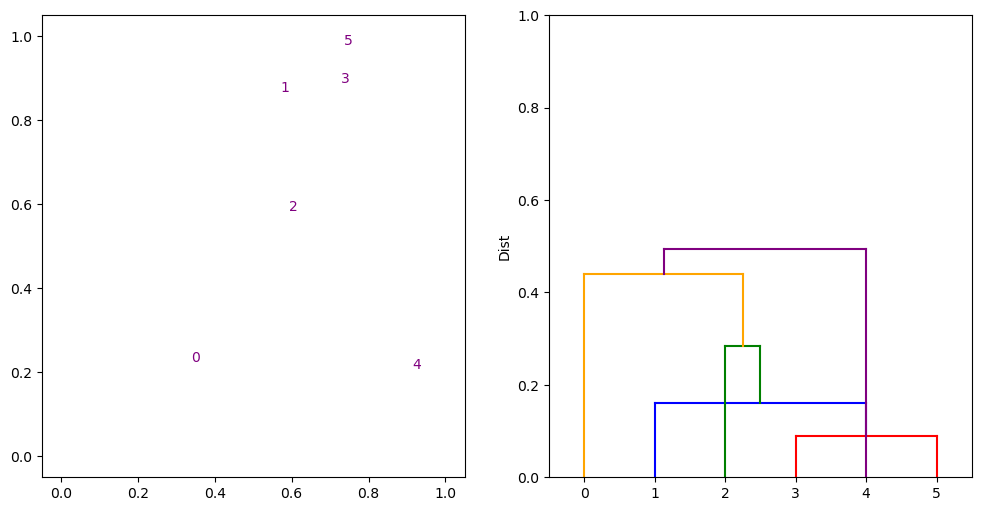

In [27]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax_x = plt.subplot(gs[0])
for ii in range(x.shape[0]):
    ax_x.text(x[ii, 0], x[ii, 1], str(ii), ma='center', color='purple')
    
ax_x.set_ylim([-0.05, 1.05])
ax_x.set_xlim([-0.05, 1.05])

ax_dist = plt.subplot(gs[1])
ax_dist.plot([Ax[0], Ax[0]], [dA[0], dA[2]], color='red')
ax_dist.plot([Ax[0], Ax[1]], [dA[2], dA[2]], color='red')
ax_dist.plot([Ax[1], Ax[1]], [dA[1], dA[2]], color='red')
ax_dist.plot([Bx[0], Bx[0]], [dB[0], dB[2]], color='blue')
ax_dist.plot([Bx[0], Bx[1]], [dB[2], dB[2]], color='blue')
ax_dist.plot([Bx[1], Bx[1]], [dB[1], dB[2]], color='blue')
ax_dist.plot([Cx[0], Cx[0]], [dC[0], dC[2]], color='green')
ax_dist.plot([Cx[0], Cx[1]], [dC[2], dC[2]], color='green')
ax_dist.plot([Cx[1], Cx[1]], [dC[1], dC[2]], color='green')
ax_dist.plot([Dx[0], Dx[0]], [dD[0], dD[2]], color='orange')
ax_dist.plot([Dx[0], Dx[1]], [dD[2], dD[2]], color='orange')
ax_dist.plot([Dx[1], Dx[1]], [dD[1], dD[2]], color='orange')
ax_dist.plot([Ex[0], Ex[0]], [dE[0], dE[2]], color='purple')
ax_dist.plot([Ex[0], Ex[1]], [dE[2], dE[2]], color='purple')
ax_dist.plot([Ex[1], Ex[1]], [dE[1], dE[2]], color='purple')
h = ax_dist.set_ylim([0, 1])
h = ax_dist.set_ylabel('Dist')
h = ax_dist.set_xlim([-0.5, x.shape[0] - 0.5])
h = ax_dist.set_xticks(range(x.shape[0]))

In [28]:
# Try changing the random seed and re-running everything up to here
# Or try changing linkage_fun to 'max' so it is complete linkage

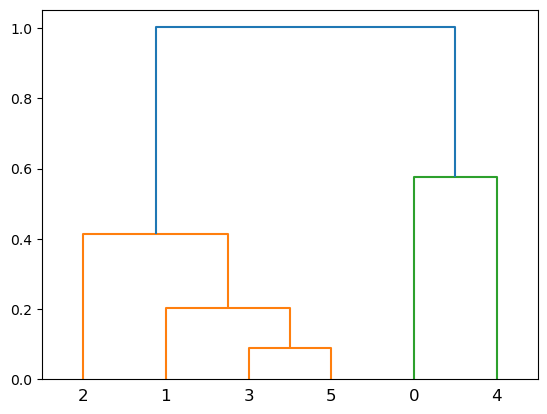

In [29]:
# USE SCIKIT-LEARN
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# Default linkage is Ward
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(x)
plot_dendrogram(model)

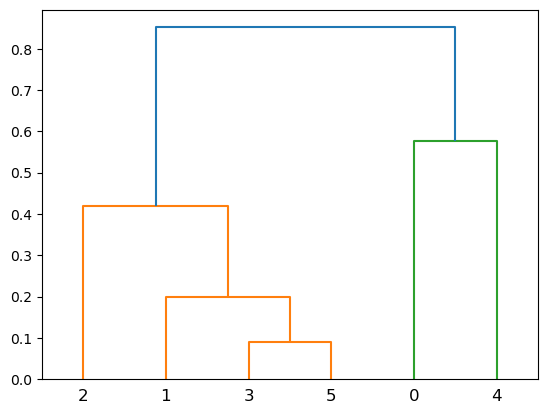

In [30]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model = model.fit(x)
plot_dendrogram(model)

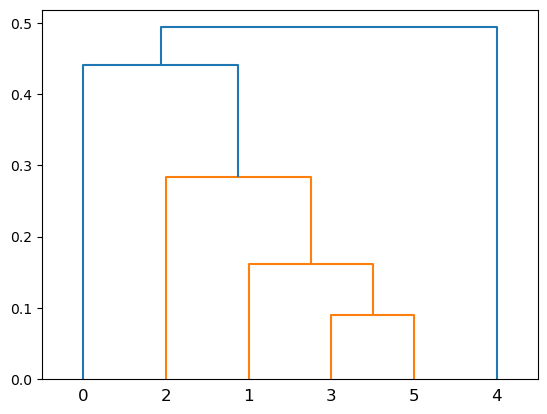

In [31]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
model = model.fit(x)
plot_dendrogram(model)